In [1]:
from pathlib import Path
import pandas as pd

In [2]:
analysis_path = Path('/projects/frame_align/data/annotated/analysis')

In [4]:
df = pd.read_csv(analysis_path.parent.parent / "srishti-analysis"/'sampled_annotated_articles.csv')

In [10]:
left_hosts = ['alternet.org', 'editor.cnn.com', 'democracynow.org', 'dailybeast.com', 'huffpost.com', 'theintercept.com','jacobin.com', 'motherjones.com', 'newyorker.com', 'slate.com',   'msnbc.com', 'vox.com']
left_lean_hosts = ['abcnews.com','apnews.com', 'theatlantic.com', 'bloomberg.com', 'cbsnews.com', 'insider.com', 'nbcnews.com', 'thenytimes.com', 'npr.com', 'politico.com', 'propublica.org', 'time.com', 'washingtonpost.com', 'yahoonews.com','usatoday.com', 'theguardian.com']
center_hosts = ['axios.com', 'bbc.com', 'forbes.com', 'newsweek.com', 'reuters.com', 'realclearpolitics.com', 'thehill.com']
right_lean_hosts = ['thedispatch.com', 'theepochtimes.com', 'foxbusiness.com', 'ijr.com', 'nypost.com', 'thepostmillennial.com', 'washingtonexaminer.com', 'washingtontimes.com']
right_hosts = ['theamericanconservative.com', 'theamericanspectator.com', 'breitbart.com', 'dailycaller.com', 'dailywire.com', 'dailymail.com', 'foxnews.com', 'newsmax.com', 'oann.com', 'thefederalist.com']

# add political leaning to df if df column 'source_domain' has names in following lists
def get_political_leaning(domain):
    if any(host in domain for host in left_hosts):
        return 'left'
    elif any(host in domain for host in left_lean_hosts):
        return 'left'
    elif any(host in domain for host in center_hosts):
        return 'center'
    elif any(host in domain for host in right_lean_hosts):
        return 'right'
    elif any(host in domain for host in right_hosts):
        return 'right'
    else:
        return 'unknown'

df['political_leaning'] = df['source_domain'].apply(get_political_leaning)



In [11]:
df.head()

,text_id,text_topic,text_topic_justification,text_summary,text_entity_name,text_justification_entity_sentiment,text_entity_sentiment,text_frame_justification,text_frame_id,text_frame_name,...,maintext,source_domain,title,title_page,title_rss,url,month,topic_label,text_length,political_leaning
0,1c76ed02-32b4-40fd-861b-40c36a678a9d,Biotech,The article discusses a biotech company named ...,"Biotech company Viome Life Sciences, which ana...",Viome Life Sciences,The entity is portrayed in a positive light as...,positive,The article primarily focuses on the financial...,1,economic,...,Share on email (opens in new window)\nShare on...,www.axios.com,Viome raises $87M Series C to fuel microbiome ...,NaN,NaN,https://www.axios.com/pro/retail-deals/2023/08...,2023-08-01_2023-08-31,Crime,3113,center
1,b3d5396f-994e-4059-9a12-95f5e693784c,Loan Scam,The article discusses a murder case where the ...,A man in Thailand is suspected of killing his ...,Loan scam,The loan scam is portrayed in a negative light...,negative,The article discusses a loan scam that led to ...,1,economic,...,BANGKOK (AP) — At least 11 people are suspecte...,apnews.com,Thai police say man kills his family after onl...,NaN,NaN,https://apnews.com/article/thailand-scam-famil...,2023-08-01_2023-08-31,Crime,2686,left
2,34715f46-30d5-4374-813e-c0fad3450c02,Economic Indicators,The article discusses various unconventional e...,The article discusses unconventional indicator...,Lipstick,The article mentions that women tend to purcha...,Positive,The article discusses various consumer-based i...,1,economic,...,"The ""lipstick index"" is based on the thought p...",www.forbes.com,"Skirt Lengths, Lipstick, Men’s Underwear And C...",NaN,NaN,https://www.forbes.com/sites/jackkelly/2023/08...,2023-08-01_2023-08-31,Crime,5464,center
3,6ffd2f95-5f87-41ff-ad74-b7b8ad665366,Gold Investment,The article discusses the process of investing...,The article discusses the process of investing...,Gold IRA,The Gold IRA is portrayed in a positive light ...,Positive,The article discusses the financial implicatio...,1,economic,...,We may receive commissions from some links to ...,www.cbsnews.com,Where to keep your gold IRA,NaN,NaN,https://www.cbsnews.com/news/where-to-keep-you...,2023-08-01_2023-08-31,Crime,4224,left
4,beadb8fb-c4d5-4e3d-bce6-9d5eecbbedb7,AMC Entertainment,The article primarily focuses on the financial...,The article discusses the financial situation ...,AMC Entertainment,The company's financial situation is still pre...,Negative,The article discusses the financial situation ...,1,economic,...,"""Barbenheimer"" buzz is fueling hopes that AMC ...",www.axios.com,"AMC gets ""Barbenheimer"" boost, but liquidity w...",NaN,NaN,https://www.axios.com/2023/08/08/amc-earnings-...,2023-08-01_2023-08-31,Crime,2079,center


In [20]:
df['topic_label'].unique()

array(['Crime', 'no_topic', 'Military', 'Politics', 'Immigration',
       'Sports', 'Wildlife', 'Conflict', 'Business', 'Royalty',
       'Technology'], dtype=object)

### Plot topics framing with polticial leaning

/tmp/ipykernel_1513648/2152189262.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 15)


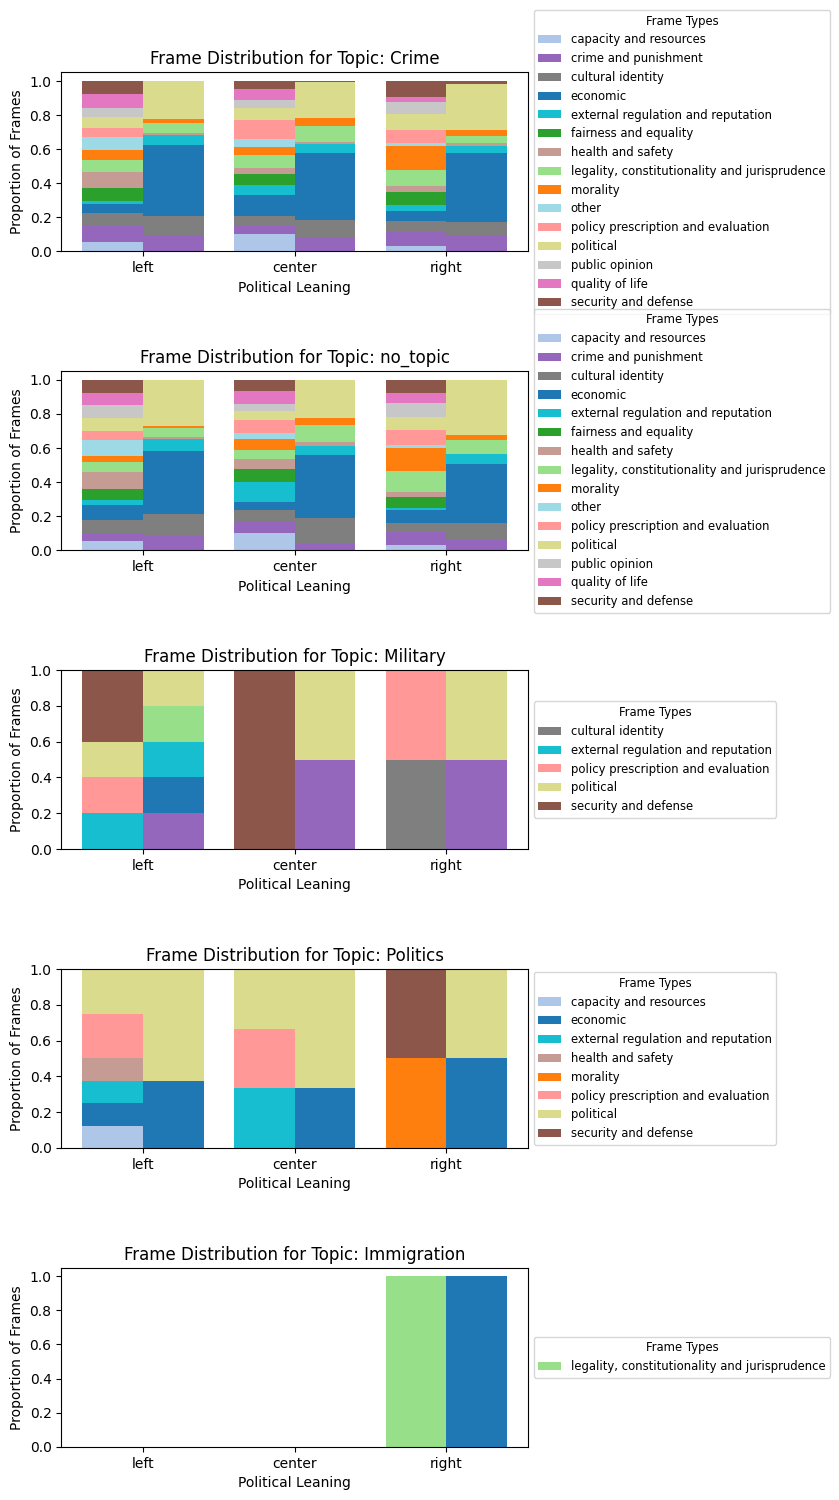

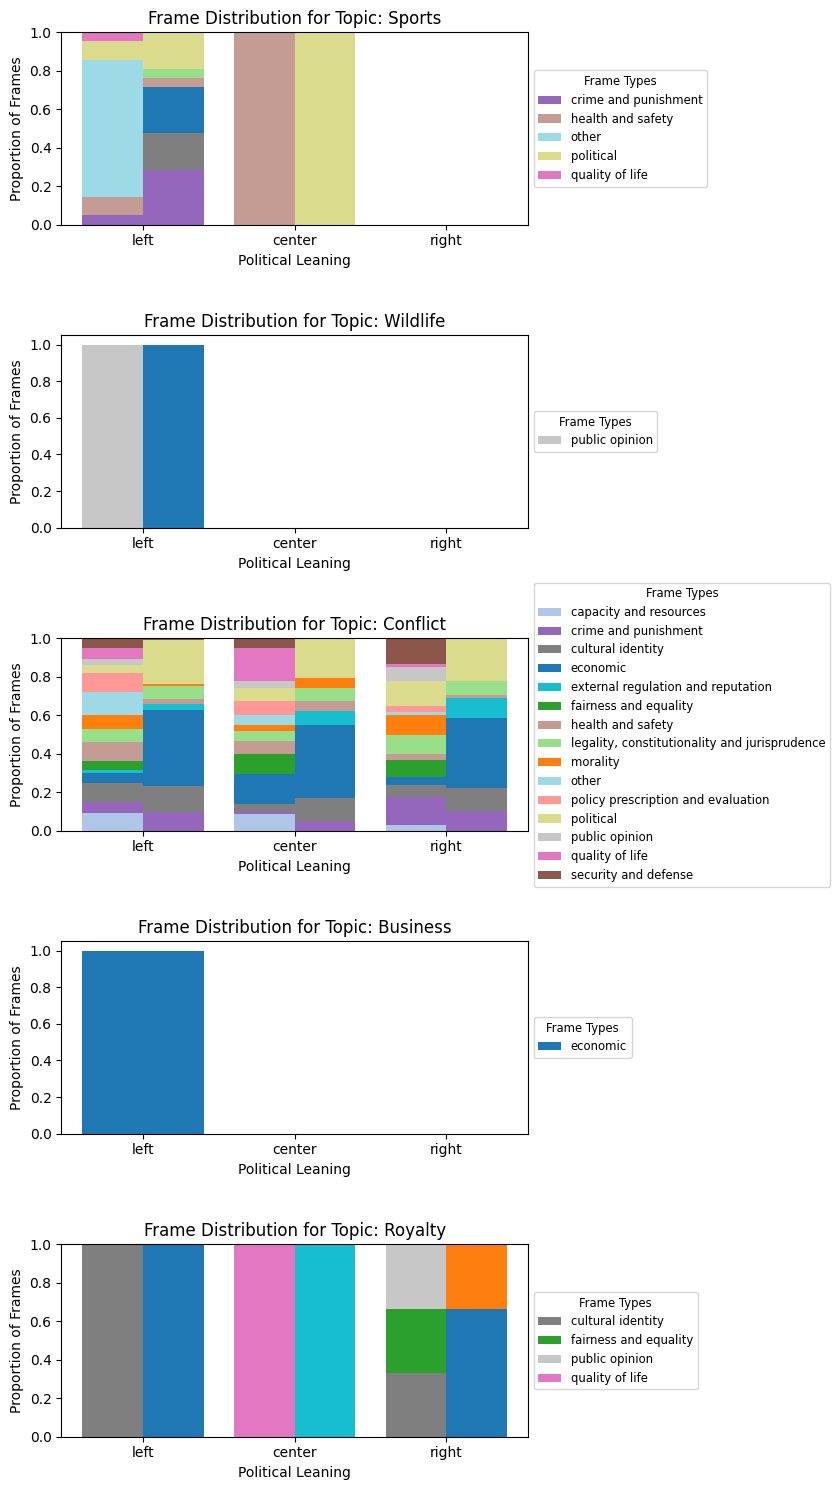

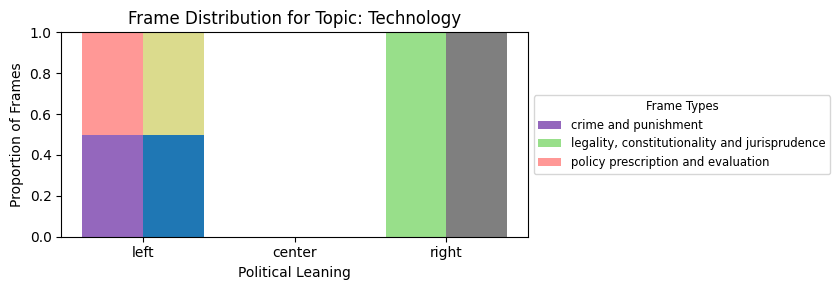

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a color map with 15 distinct colors
colors = plt.cm.get_cmap('tab20', 15)

# Assuming political leanings are 'left', 'center', 'right' in the DataFrame
leaning_order = ['left', 'center', 'right']

# Create a dictionary to map frame names to consistent colors for both text and vision
all_frames = pd.concat([df['text_frame_name'], df['vision_frame-name']]).unique()
frame_color_map = {frame: colors(i) for i, frame in enumerate(all_frames)}

topics = df['topic_label'].unique()

# Number of subplots per figure (to prevent large figure size)
subplots_per_figure = 5

# Create multiple figures if necessary
for i in range(0, len(topics), subplots_per_figure):
    fig, axes = plt.subplots(nrows=min(subplots_per_figure, len(topics) - i), ncols=1, figsize=(10, 3 * min(subplots_per_figure, len(topics) - i)))
    
    if len(topics[i:i+subplots_per_figure]) == 1:
        axes = [axes]  # Ensure axes is iterable even if only one topic

    for idx, (topic, ax) in enumerate(zip(topics[i:i+subplots_per_figure], axes)):
        topic_df = df[df['topic_label'] == topic]

        # Text frame distribution
        text_frame_distribution = topic_df.groupby(['political_leaning', 'text_frame_name']).size().unstack(fill_value=0)
        text_frame_distribution = text_frame_distribution.div(text_frame_distribution.sum(axis=1), axis=0)

        # Vision frame distribution
        vision_frame_distribution = topic_df.groupby(['political_leaning', 'vision_frame-name']).size().unstack(fill_value=0)
        vision_frame_distribution = vision_frame_distribution.div(vision_frame_distribution.sum(axis=1), axis=0)

        # Reindex to ensure left, center, right are in the correct order
        text_frame_distribution = text_frame_distribution.reindex(leaning_order, fill_value=0)
        vision_frame_distribution = vision_frame_distribution.reindex(leaning_order, fill_value=0)

        # X positions for the bars: one for text, one for vision per political leaning
        x = np.arange(len(leaning_order))

        # Collect handles and labels for this subplot's legend
        handles, labels = [], []
        added_frames = set()  # Keep track of frames that have already been added to avoid duplication

        # Plot text frame distribution as stacked bars
        bottom_text = np.zeros(len(leaning_order))  # Bottom for stacking
        for frame in text_frame_distribution.columns:
            for j, leaning in enumerate(leaning_order):
                if leaning in text_frame_distribution.index:  # If there is data for this leaning
                    bar = ax.bar(x[j] - 0.2, text_frame_distribution.loc[leaning, frame], 
                                 bottom=bottom_text[j], width=0.4, color=frame_color_map[frame])
                    bottom_text[j] += text_frame_distribution.loc[leaning, frame]
                    
                    # Add frame name to legend only once (for text and vision both)
                    if frame not in added_frames:
                        handles.append(bar[0])  # Add the bar (handle) once
                        labels.append(f'{frame}')  # Just the frame name, no 'Text' or 'Vision'
                        added_frames.add(frame)  # Mark frame as added
    
        # Plot vision frame distribution as stacked bars
        bottom_vision = np.zeros(len(leaning_order))  # Bottom for stacking
        for frame in vision_frame_distribution.columns:
            for j, leaning in enumerate(leaning_order):
                if leaning in vision_frame_distribution.index:  # If there is data for this leaning
                    bar = ax.bar(x[j] + 0.2, vision_frame_distribution.loc[leaning, frame], 
                                 bottom=bottom_vision[j], width=0.4, color=frame_color_map[frame])
                    bottom_vision[j] += vision_frame_distribution.loc[leaning, frame]
                    
                    # No need to add the frame again if it's already in the legend from the text frames

        # Customize the subplot for this topic
        ax.set_title(f'Frame Distribution for Topic: {topic}')
        ax.set_xlabel('Political Leaning')
        ax.set_ylabel('Proportion of Frames')
        ax.set_xticks(x)
        ax.set_xticklabels(leaning_order)

        # Add legend next to each subplot without separating text/vision
        ax.legend(handles, labels, title='Frame Types', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='small')

    # Adjust the layout to ensure the subplots fit nicely
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout rect to leave room for legends
    plt.show()
